# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Проверим пропуски

In [8]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

В обоих датасетах отсутствуют пропуски, нас таргет будет в столбце Churn

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

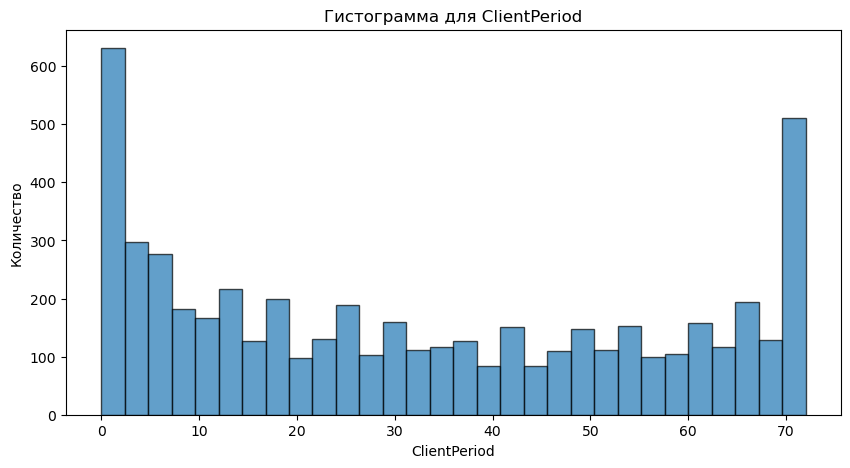

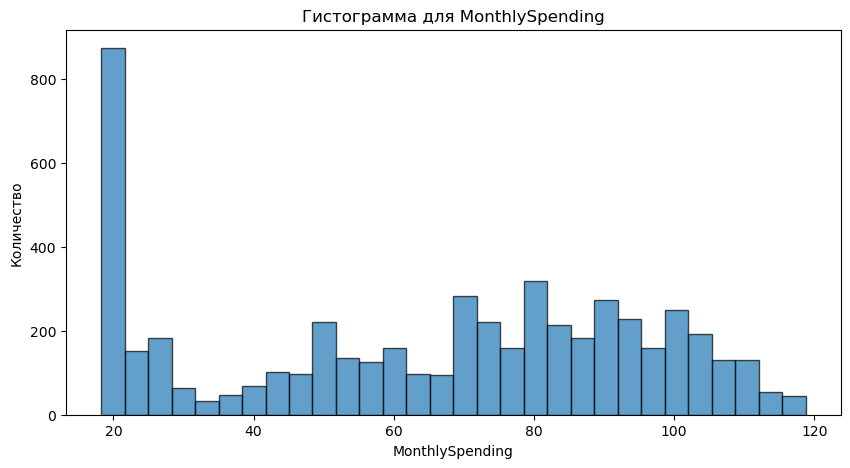

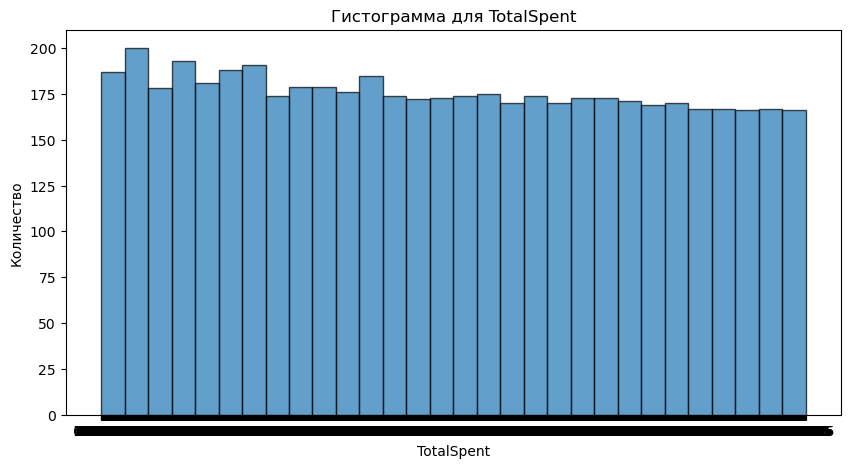

In [10]:
for feature in num_cols:
    plt.figure(figsize=(10, 5))

    # Гистограмма
    plt.hist(train[feature].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Гистограмма для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.show()

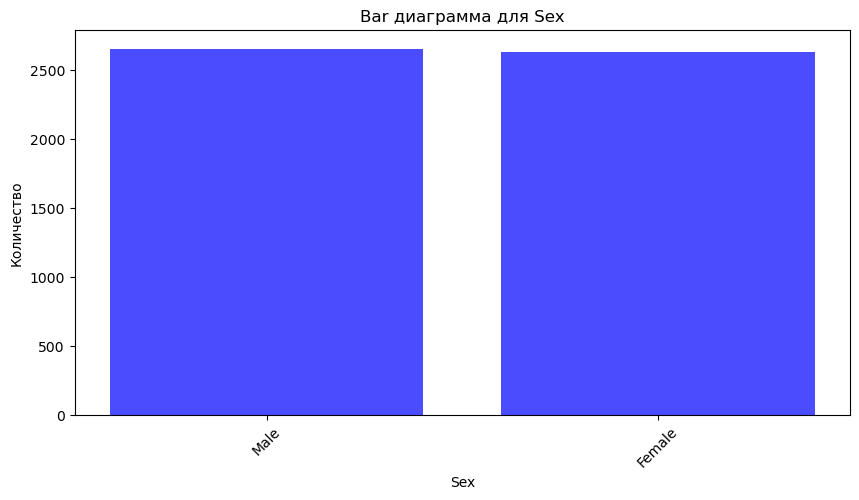

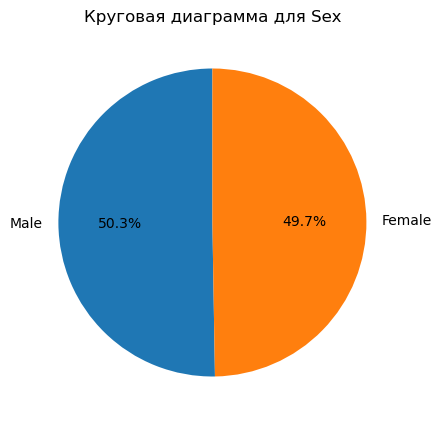

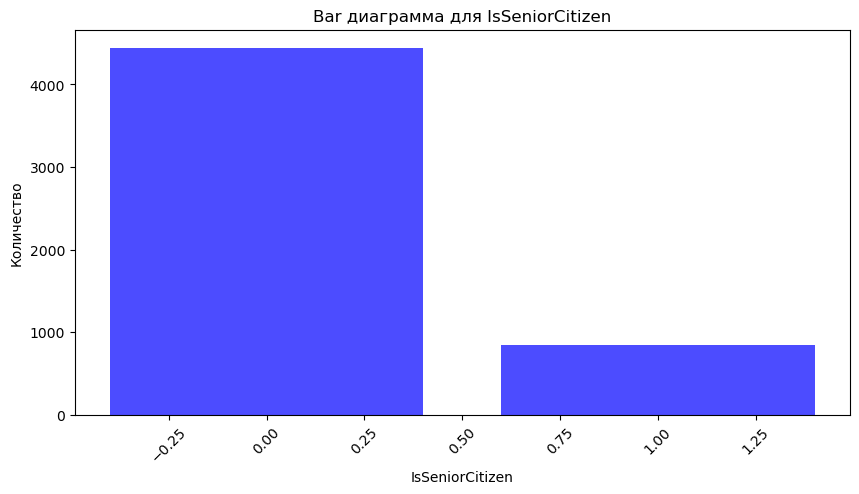

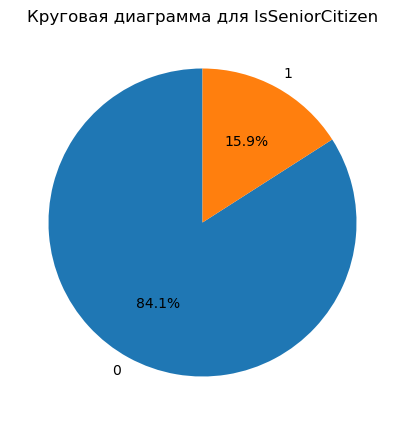

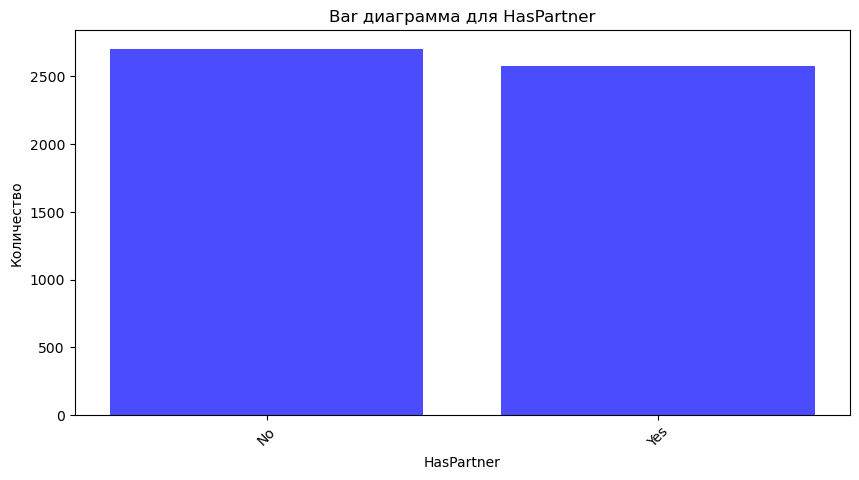

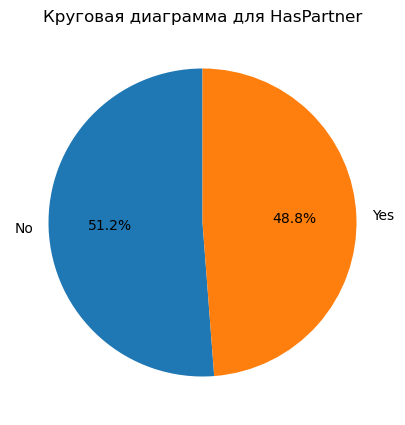

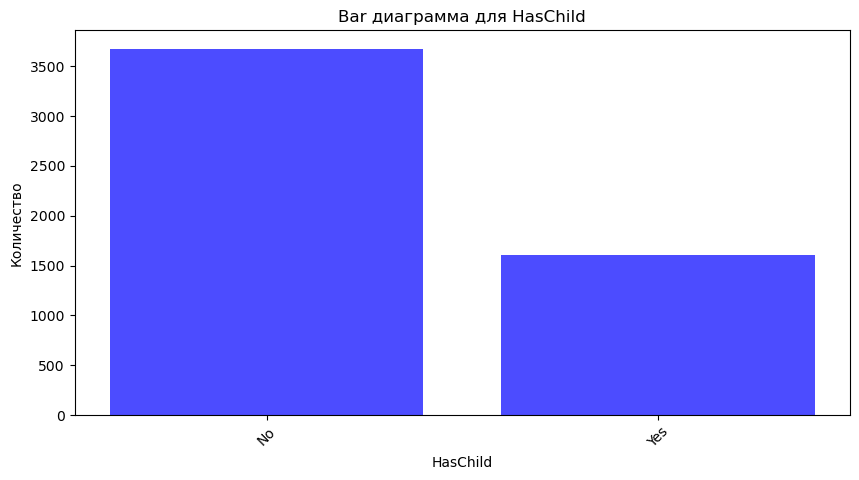

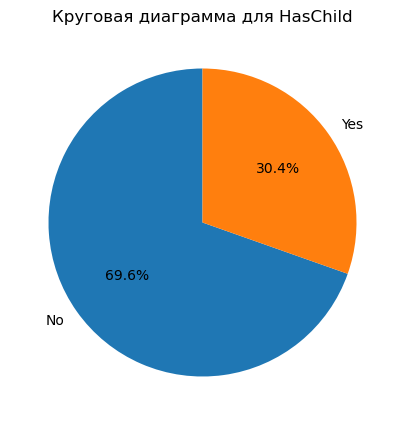

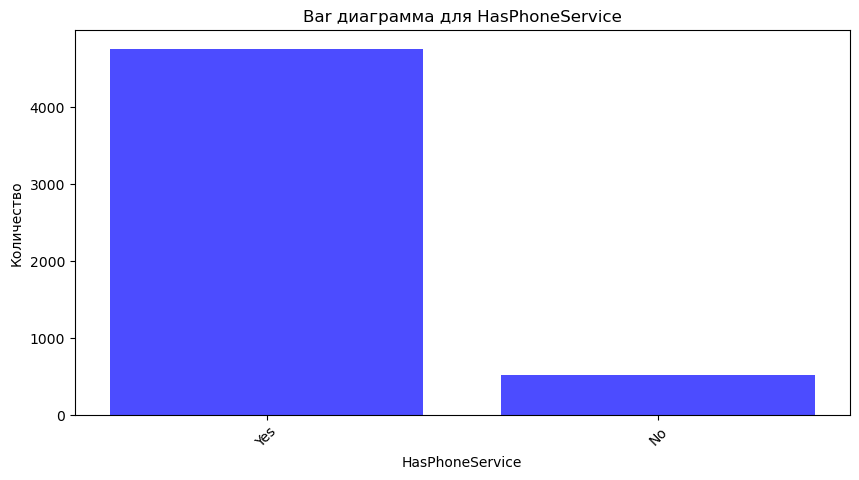

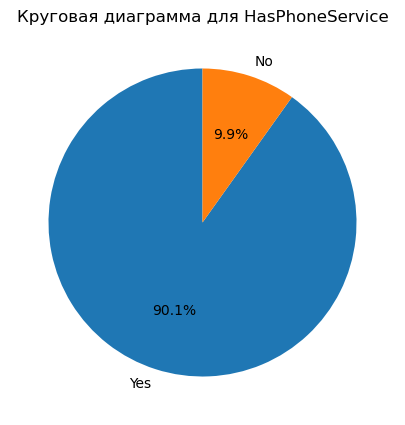

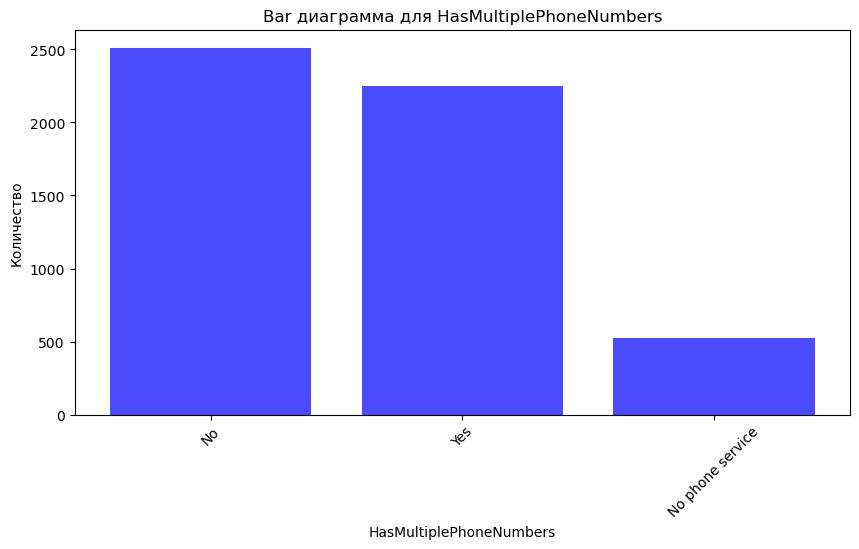

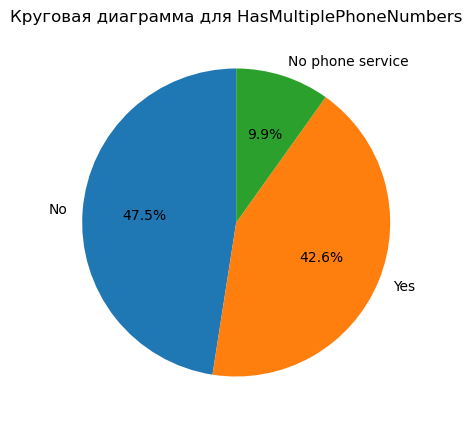

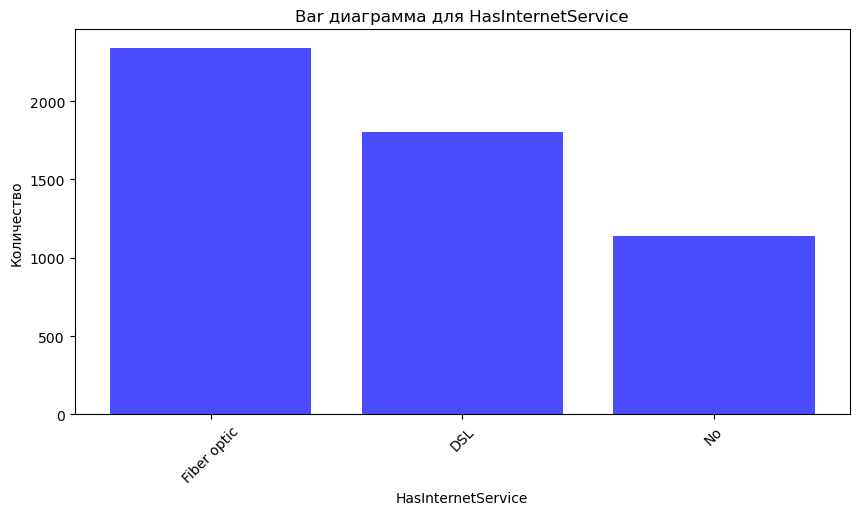

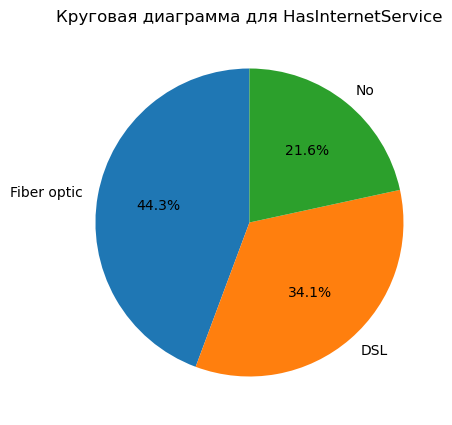

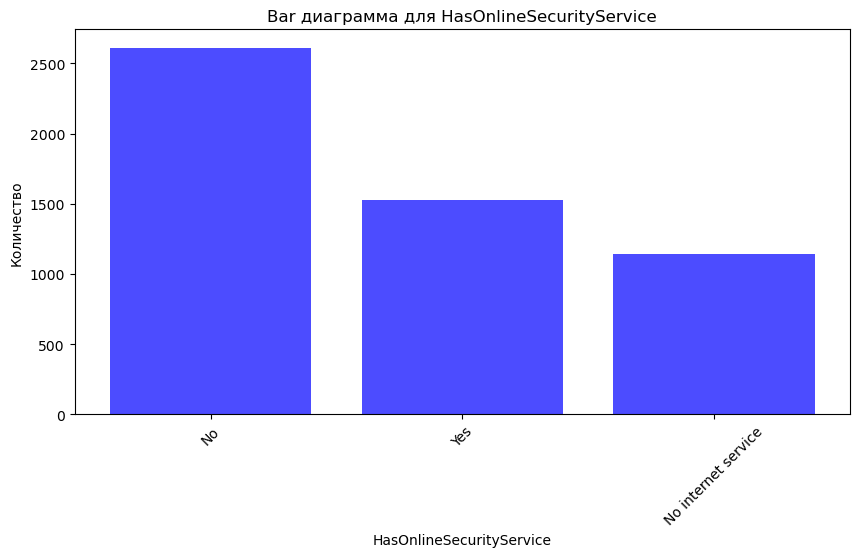

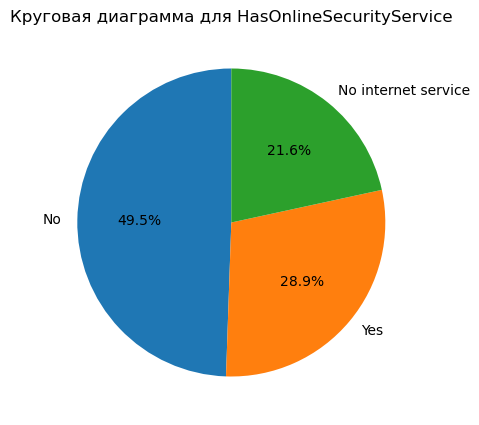

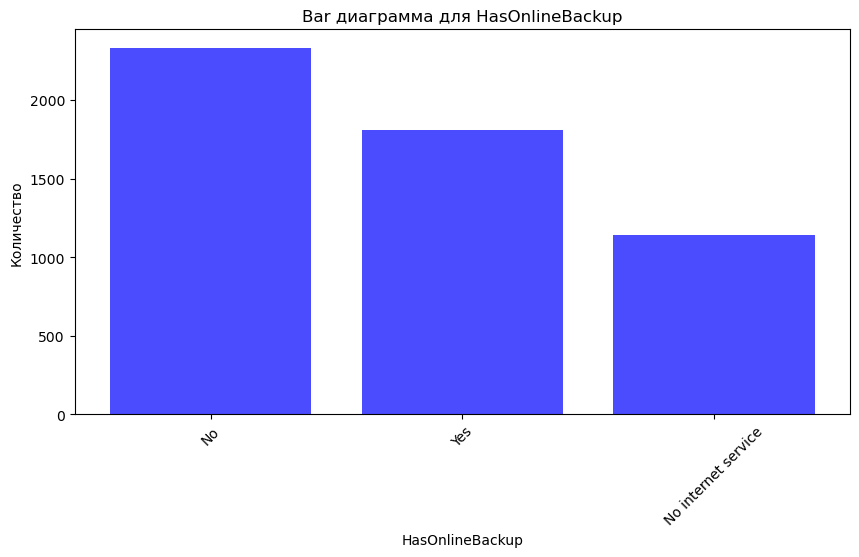

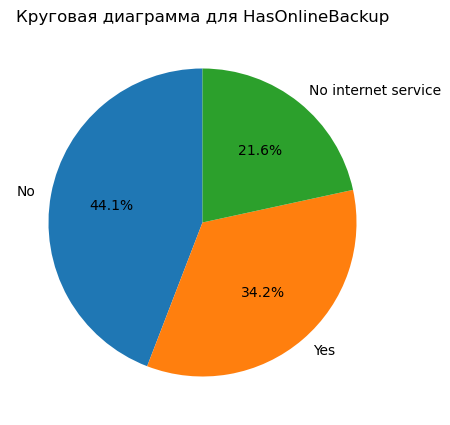

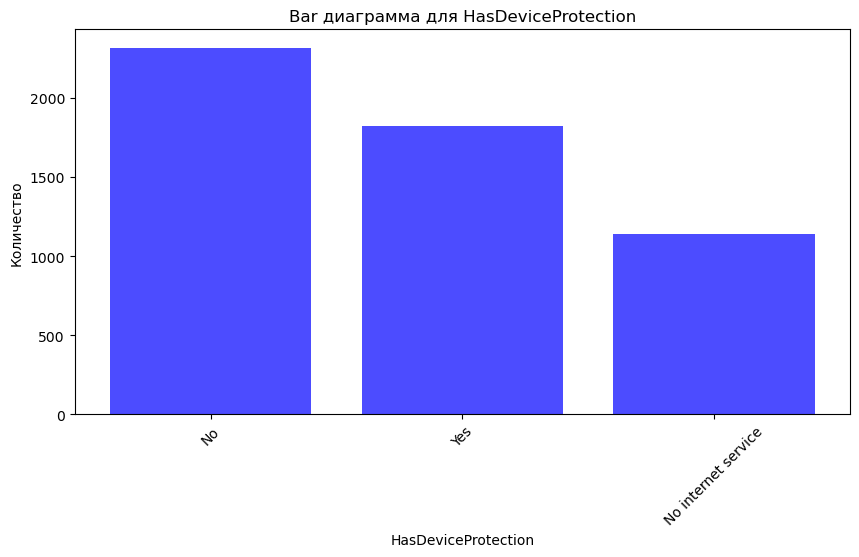

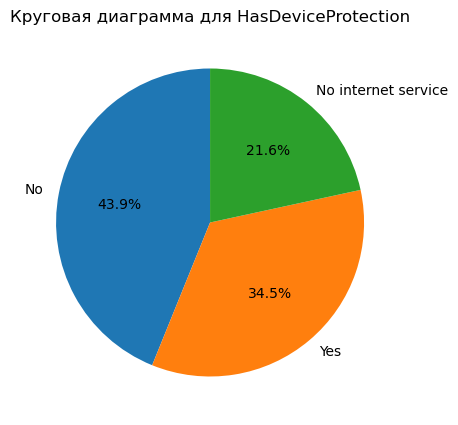

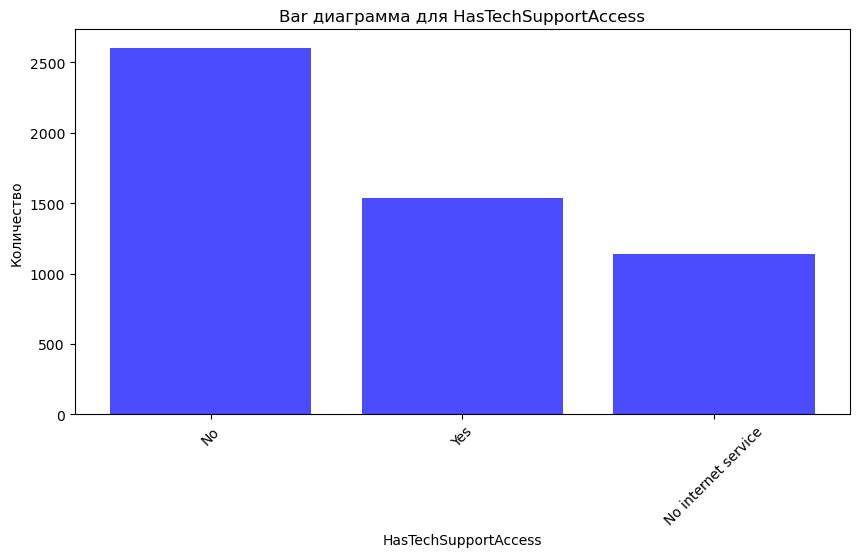

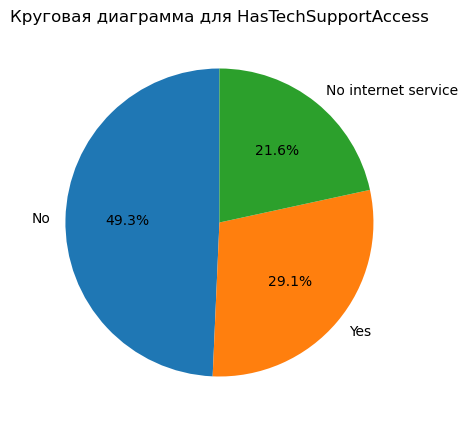

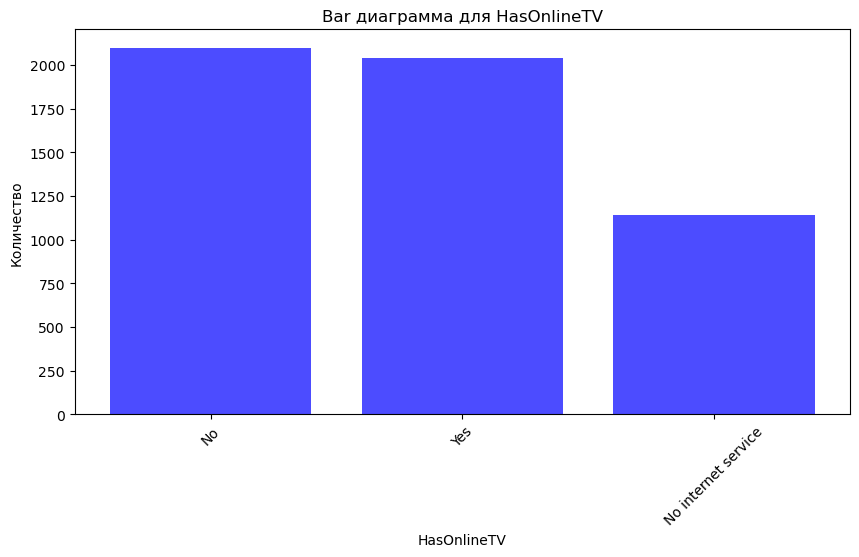

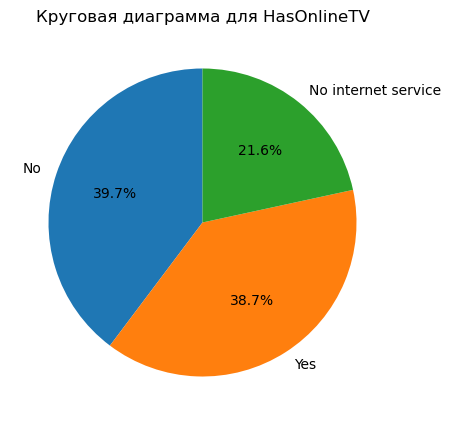

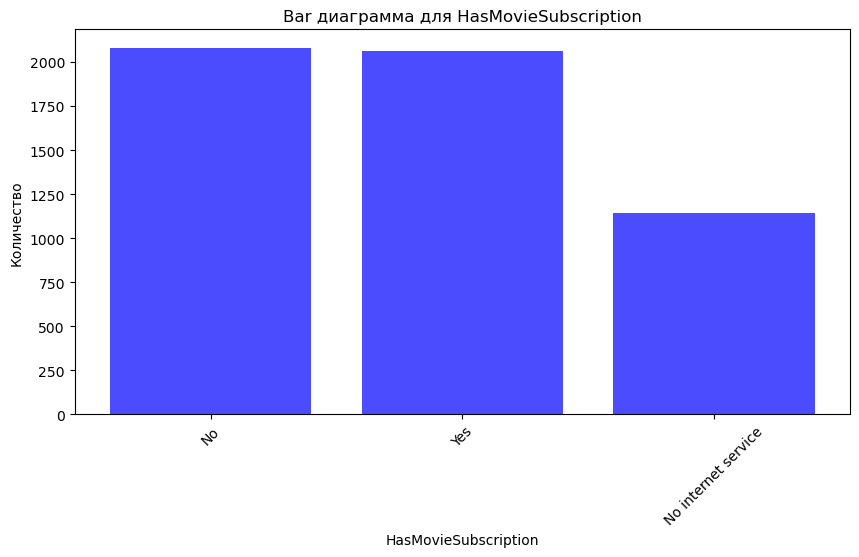

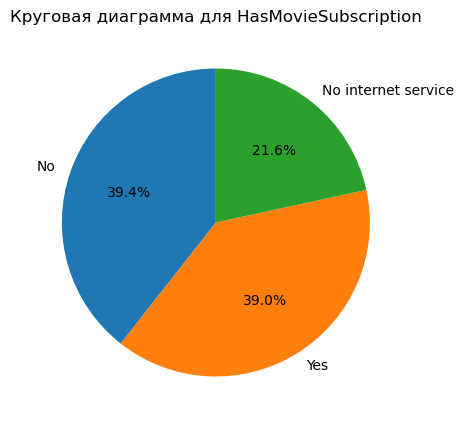

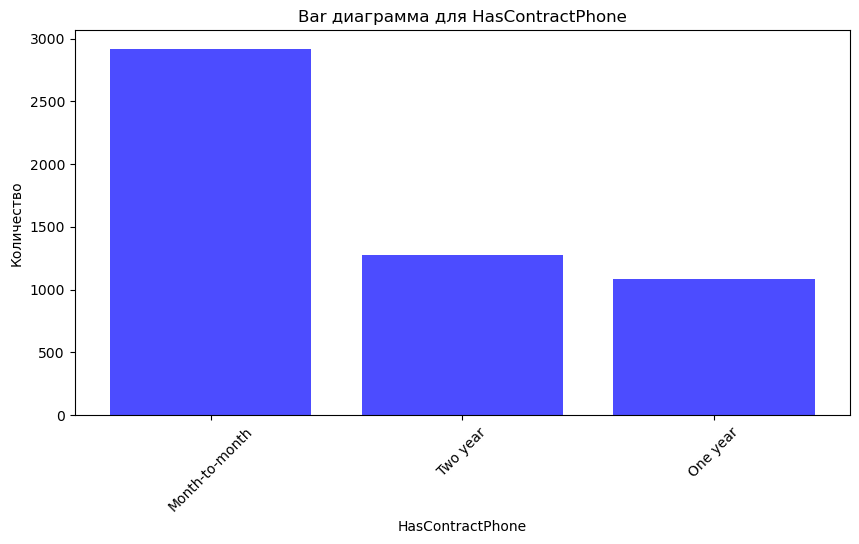

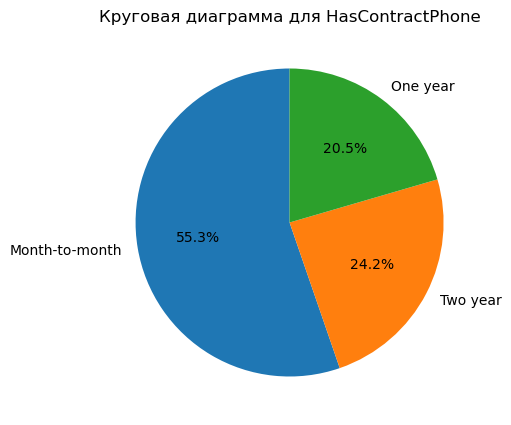

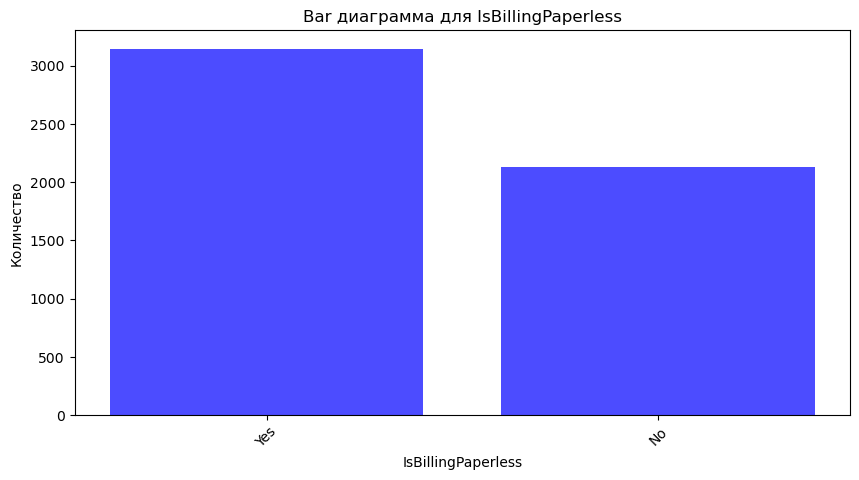

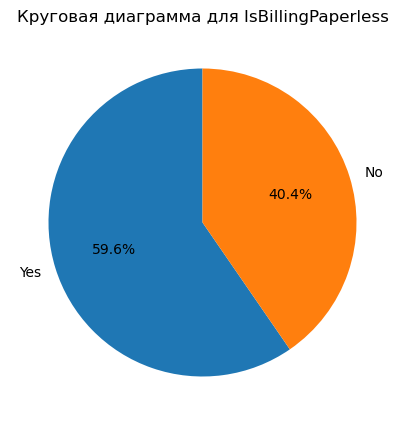

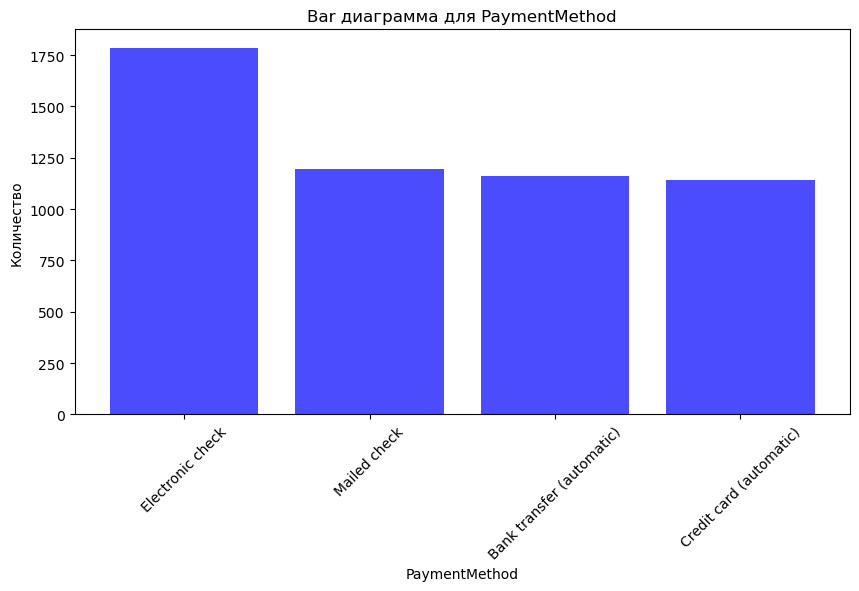

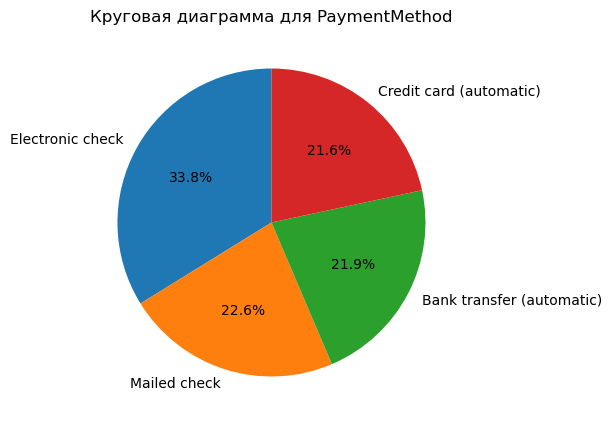

In [11]:
for feature in cat_cols:
    values_count = train[feature].value_counts()

    plt.figure(figsize=(10, 5))

    # Bar диаграмма
    plt.bar(values_count.index, values_count.values, color='blue', alpha=0.7)
    plt.title(f'Bar диаграмма для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()

    # Если вы хотите построить круговую диаграмму:
    plt.figure(figsize=(10, 5))
    plt.pie(values_count.values, labels=values_count.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Круговая диаграмма для {feature}')
    plt.show()



In [36]:
train.corr()

ValueError: could not convert string to float: 'Male'

Предварительные выводы по анализу данных:
1. Отсутствуют пропуски в данных
2. Не везде равномерное распределение данных, поэтому можно будет для достижения нужной метрики поэксперементировать по обрезанию хвостов в данных
3. По некторым признакам существует сильный дисбаланс классов, можно попробовать поиграть весами в моделях, использовать метрику F1, но у нас есть метрика по ТЗ, поэтому надо сбалансировать данные, посмотрим, как это будет влиять на наши данные
4. Можно объединить 'No internet service' и 'No' в одну категорию
5. Есть проблема с пробелами, где вместо пустых значений указаны пробелы, требуется допобработка

Обработка данных

In [12]:
# Объединим 'No internet service' и 'No' в одну категорию
features_with_no_internet = [
    'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
    'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription'
]

for feature in features_with_no_internet:
    train[feature] = train[feature].replace('No internet service', 'No')

In [13]:
train['TotalSpent'] = train['TotalSpent'].replace(' ', '0').astype(float)


Обработка тестовых данных

In [14]:
features_with_no_internet = [
    'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
    'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription'
]

for feature in features_with_no_internet:
    test[feature] = test[feature].replace('No internet service', 'No')

In [15]:
test['TotalSpent'] = test['TotalSpent'].replace(' ', '0').astype(float)

In [35]:
train = train.drop_duplicates(keep='first')
train = train.reset_index(drop=True)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [16]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer


создадим трансформеры для численных и категориальных признаков:

In [18]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [19]:
num_transformer = StandardScaler()


Соединим их в один ColumnTransformer:

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])


In [21]:
X = train.drop('Churn', axis=1)
y = train['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [22]:


clf = make_pipeline(preprocessor, LogisticRegressionCV(scoring='roc_auc', refit=True, cv=5, class_weight = 'balanced'))
clf.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
                                                   'IsBillingPaperless',
                                                   'PaymentMethod'])])),
                ('logisticregressioncv',
                 LogisticRegressionCV(class_weight='balanced', cv=5,
                                      scoring='roc_auc'))])

In [23]:
print("Лучший параметр C:", clf.named_steps['logisticregressioncv'].C_)

Лучший параметр C: [2.7825594]


In [24]:
X = train.drop('Churn', axis=1)
y = train['Churn']

pipeline = make_pipeline(preprocessor, LogisticRegression(class_weight = 'balanced'))

param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X, y)


/Users/aleksandrivanov/opt/anaconda3/envs/Cozmo/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc')

In [25]:
print("Лучший параметр C:", grid_search.best_params_)
print("Лучший ROC-AUC:", grid_search.best_score_)


Лучший параметр C: {'logisticregression__C': 100}
Лучший ROC-AUC: 0.8448037634936771


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучший параметр C: {'logisticregression__C': 100}
Лучший ROC-AUC: 0.8448037634936771

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [26]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [27]:
catboost_default = CatBoostClassifier(
    cat_features=cat_cols,
    verbose=0,
    auto_class_weights='Balanced'
)

catboost_default.fit(X_train, y_train)
valid_predictions = catboost_default.predict_proba(X_valid)[:, 1]
roc_auc_default = roc_auc_score(y_valid, valid_predictions)

print(f"ROC-AUC with default parameters: {roc_auc_default}")


ROC-AUC with default parameters: 0.8504929186337129


In [28]:
learning_rates = [0.01, 0.05, 0.1, 0.5]
n_trees = [100, 500, 1000]

best_roc_auc = 0
best_params = {}

for lr in learning_rates:
    for n in n_trees:
        catboost_model = CatBoostClassifier(
            cat_features=cat_cols,
            learning_rate=lr,
            n_estimators=n,
            verbose=0,
            auto_class_weights='Balanced'
        )
        catboost_model.fit(X_train, y_train)
        valid_predictions = catboost_model.predict_proba(X_valid)[:, 1]
        roc_auc = roc_auc_score(y_valid, valid_predictions)

        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_params = {'learning_rate': lr, 'n_estimators': n}

print(f"Best ROC-AUC: {best_roc_auc}")
print(f"Best parameters: {best_params}")


Best ROC-AUC: 0.8542951032120707
Best parameters: {'learning_rate': 0.01, 'n_estimators': 1000}


In [29]:
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')

In [30]:
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'num_trees': np.linspace(200, 400, 10),
    'learning_rate': np.linspace(0.01, 0.03, 30)
}

cb_cv = CatBoostClassifier(cat_features=cat_cols, verbose=False)
gs = GridSearchCV(
   estimator=cb_cv,
   param_grid=param_grid,
   scoring='roc_auc'
)

gs.fit(X, y);
print(f"best_score: {gs.best_score_},\nbest_params: {gs.best_params_}")

best_score: 0.8470041028692318,
best_params: {'learning_rate': 0.019655172413793102, 'num_trees': 400.0}


In [31]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid, reference=d_train)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'class_weight': 'balanced'
}

lgb_model = lgb.train(
    params,
    d_train,
    valid_sets=d_valid,
    num_boost_round=1000,

)

valid_predictions = lgb_model.predict(X_valid, num_iteration=lgb_model.best_iteration)
roc_auc_lgb = roc_auc_score(y_valid, valid_predictions)

print(f"ROC-AUC with LightGBM: {roc_auc_lgb}")



[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 1107, number of negative: 3118
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 4225, number of used features: 19
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262012 -> initscore=-1.035538
[LightGBM] [Info] Start training from score -1.035538
[1]	valid_0's auc: 0.829432
[2]	valid_0's auc: 0.842141
[3]	valid_0's auc: 0.841445
[4]	valid_0's auc: 0.845436
[5]	valid_0's auc: 0.844844
[6]	valid_0's auc: 0.845485
[7]	valid_0's auc: 0.846533
[8]	valid_0's auc: 0.846843
[9]	valid_0's auc: 0.847887
[10]	valid_0's auc: 0.847827
[11

[316]	valid_0's auc: 0.830332
[317]	valid_0's auc: 0.830304
[318]	valid_0's auc: 0.830267
[319]	valid_0's auc: 0.830267
[320]	valid_0's auc: 0.830161
[321]	valid_0's auc: 0.830031
[322]	valid_0's auc: 0.829813
[323]	valid_0's auc: 0.82973
[324]	valid_0's auc: 0.829656
[325]	valid_0's auc: 0.829647
[326]	valid_0's auc: 0.829855
[327]	valid_0's auc: 0.829499
[328]	valid_0's auc: 0.829365
[329]	valid_0's auc: 0.829434
[330]	valid_0's auc: 0.829198
[331]	valid_0's auc: 0.829008
[332]	valid_0's auc: 0.828855
[333]	valid_0's auc: 0.828957
[334]	valid_0's auc: 0.828804
[335]	valid_0's auc: 0.828999
[336]	valid_0's auc: 0.828892
[337]	valid_0's auc: 0.829068
[338]	valid_0's auc: 0.828962
[339]	valid_0's auc: 0.829008
[340]	valid_0's auc: 0.829054
[341]	valid_0's auc: 0.829115
[342]	valid_0's auc: 0.829041
[343]	valid_0's auc: 0.828939
[344]	valid_0's auc: 0.828911
[345]	valid_0's auc: 0.828883
[346]	valid_0's auc: 0.828791
[347]	valid_0's auc: 0.828578
[348]	valid_0's auc: 0.828402
[349]	valid

[603]	valid_0's auc: 0.82076
[604]	valid_0's auc: 0.820663
[605]	valid_0's auc: 0.820654
[606]	valid_0's auc: 0.820617
[607]	valid_0's auc: 0.820585
[608]	valid_0's auc: 0.820487
[609]	valid_0's auc: 0.820349
[610]	valid_0's auc: 0.820279
[611]	valid_0's auc: 0.820284
[612]	valid_0's auc: 0.820261
[613]	valid_0's auc: 0.820233
[614]	valid_0's auc: 0.820062
[615]	valid_0's auc: 0.820011
[616]	valid_0's auc: 0.819863
[617]	valid_0's auc: 0.819858
[618]	valid_0's auc: 0.819728
[619]	valid_0's auc: 0.819525
[620]	valid_0's auc: 0.819478
[621]	valid_0's auc: 0.819418
[622]	valid_0's auc: 0.819432
[623]	valid_0's auc: 0.819432
[624]	valid_0's auc: 0.819446
[625]	valid_0's auc: 0.819335
[626]	valid_0's auc: 0.819293
[627]	valid_0's auc: 0.819298
[628]	valid_0's auc: 0.819103
[629]	valid_0's auc: 0.819071
[630]	valid_0's auc: 0.81909
[631]	valid_0's auc: 0.819159
[632]	valid_0's auc: 0.819131
[633]	valid_0's auc: 0.819191
[634]	valid_0's auc: 0.819228
[635]	valid_0's auc: 0.819247
[636]	valid_

[985]	valid_0's auc: 0.813818
[986]	valid_0's auc: 0.813744
[987]	valid_0's auc: 0.813744
[988]	valid_0's auc: 0.813711
[989]	valid_0's auc: 0.813656
[990]	valid_0's auc: 0.81361
[991]	valid_0's auc: 0.813531
[992]	valid_0's auc: 0.813346
[993]	valid_0's auc: 0.813332
[994]	valid_0's auc: 0.813225
[995]	valid_0's auc: 0.813337
[996]	valid_0's auc: 0.813281
[997]	valid_0's auc: 0.813337
[998]	valid_0's auc: 0.813318
[999]	valid_0's auc: 0.813318
[1000]	valid_0's auc: 0.813313
ROC-AUC with LightGBM: 0.8133134314542257


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Best ROC-AUC: 0.8541701379246505
Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}

Выводы по разделу:
1. Была проведена работа в соответствии с тз, итоговая метрика на тестовой сборке на Stepike 0.85
2. Модель линейная регрессия вместе с Гридсерчем показала очень хороший результат, но для её использования требуется большое количество предобратки данных. Поэтому если в ТЗ не требуется именно она, то лучше взять градиентный бустинг.
3. Было протестированно несколько вариантов моделей ГБ: Catboost и Catboost + GS, lightGBM. По результатам самая лучшая метрика была у просто Catboost, но я отдаю предпочтение комбинации с GS, так как у него используется кросс валидация, а значит модель будет стабильнее и надежнее выдавать результаты.

# Предсказания

In [32]:
best_model = gs

In [33]:
X_test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

submission['Churn'] = gs.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission-6.csv')

Лучшее решение отправьте в Stepik.

In [34]:
submission.head()

,Id,Churn
0,0,0.041549
1,1,0.646237
2,2,0.662247
3,3,0.015472
4,4,0.004964
